# Name= Krishna Thoria
Data Science

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

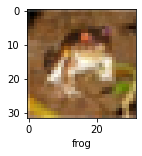

In [12]:
plot_sample(X_train, y_train, 0)

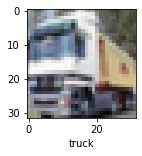

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 113s 72ms/step - loss: nan - accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 109s 70ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 95s 60ms/step - loss: nan - accuracy: 0.1000


In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6622 - accuracy: 0.7701
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6201 - accuracy: 0.7857
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6024 - accuracy: 0.7893
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5673 - accuracy: 0.8015
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5508 - accuracy: 0.8113
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5181 - accuracy: 0.8215
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4987 - accuracy: 0.8277
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4906 - accuracy: 0.8321
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.4607 - accuracy: 0.8405
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1124 - accuracy: 0.6527


[1.1123554706573486, 0.6527000069618225]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.45912489e-03, 1.13357219e-05, 8.07096891e-04, 8.44956815e-01,
        1.17833575e-03, 1.01974286e-01, 6.68720575e-03, 2.21144976e-04,
        4.16440479e-02, 6.06159156e-05],
       [7.95075786e-04, 2.75792740e-03, 7.44237827e-09, 5.20269422e-14,
        9.46794341e-19, 4.86709604e-14, 7.65995221e-18, 2.42317187e-14,
        9.96439993e-01, 7.04916192e-06],
       [8.50025654e-01, 1.35440407e-02, 1.86242834e-02, 5.72477409e-04,
        1.65761812e-04, 1.09721477e-05, 2.70150304e-05, 7.10617285e-03,
        1.00280598e-01, 9.64305364e-03],
       [4.10484746e-02, 8.96798547e-09, 4.68955278e-01, 7.43322204e-08,
        2.58649795e-08, 1.08177495e-07, 3.92685801e-10, 4.31327507e-08,
        4.89499629e-01, 4.96415421e-04],
       [1.06879987e-03, 3.80353413e-05, 4.73318249e-02, 1.27355158e-01,
        1.76564783e-01, 2.68132575e-02, 6.19580567e-01, 7.08232925e-04,
        4.65827732e-04, 7.34282585e-05]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 8, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

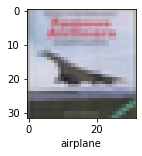

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'ship'